https://towardsdatascience.com/detection-of-price-support-and-resistance-levels-in-python-baedc44c34c9

In [11]:
#!pip3 install yfinance
#!pip3 install mpl_finance
#!pip3 install mplfinance

In [14]:
%matplotlib inline

import pandas as pd
import numpy as np
import yfinance
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mpl_dates
import matplotlib.pyplot as plt
import pandas_datareader.data as web

plt.rcParams['figure.figsize'] = [12, 7]
plt.rc('font', size=14)

In [ ]:
#goal = "ETH-USD"
#df = web.DataReader(goal, 'yahoo')

In [2]:
name = 'ETH-USD'
ticker = yfinance.Ticker(name)
df = ticker.history(interval="1d",start="2020-03-15", end="2020-10-03")

df['Date'] = pd.to_datetime(df.index)
df['Date'] = df['Date'].apply(mpl_dates.date2num)
df = df.loc[:,['Date', 'Open', 'High', 'Low', 'Close']]

In [3]:
# Let’s not create two functions that identify the 4-candles fractals.
def isSupport(df,i):
  support = df['Low'][i] < df['Low'][i-1] and df['Low'][i] < df['Low'][i+1] and df['Low'][i+1] < df['Low'][i+2] and df['Low'][i-1] < df['Low'][i-2]
  return support

def isResistance(df,i):
  resistance = df['High'][i] > df['High'][i-1]  and df['High'][i] > df['High'][i+1] and df['High'][i+1] > df['High'][i+2] and df['High'][i-1] > df['High'][i-2]
  return resistance

In [4]:
levels = []
for i in range(2,df.shape[0]-2):
  if isSupport(df,i):
    levels.append((i,df['Low'][i]))
  elif isResistance(df,i):
    levels.append((i,df['High'][i]))

In [15]:
def plot_all():
  fig, ax = plt.subplots()
  candlestick_ohlc(ax,df.values,width=0.6, \
                   colorup='green', colordown='red', alpha=0.8)
  date_format = mpl_dates.DateFormatter('%d %b %Y')
  ax.xaxis.set_major_formatter(date_format)
  fig.autofmt_xdate()
  fig.tight_layout()
  for level in levels:
    plt.hlines(level[1],xmin=df['Date'][level[0]],\
               xmax=max(df['Date']),colors='blue')
  fig.show()

/home/caiquecoelho/.local/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


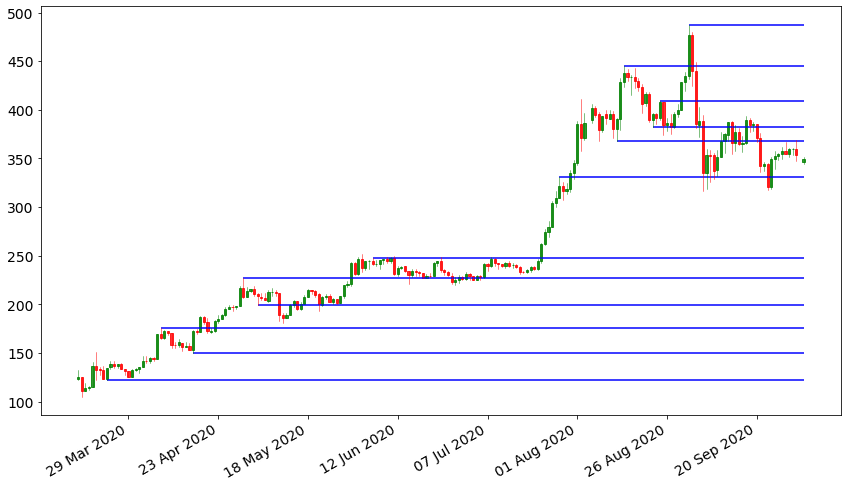

In [16]:
plot_all()

In [17]:
s =  np.mean(df['High'] - df['Low'])

In [18]:
def isFarFromLevel(l):
   return np.sum([abs(l-x) < s for x in levels]) == 0

In [19]:
levels = []
for i in range(2,df.shape[0]-2):
  if isSupport(df,i):
    l = df['Low'][i]
    if isFarFromLevel(l):
      levels.append((i,l))
  elif isResistance(df,i):
    l = df['High'][i]
    if isFarFromLevel(l):
      levels.append((i,l))

/home/caiquecoelho/.local/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


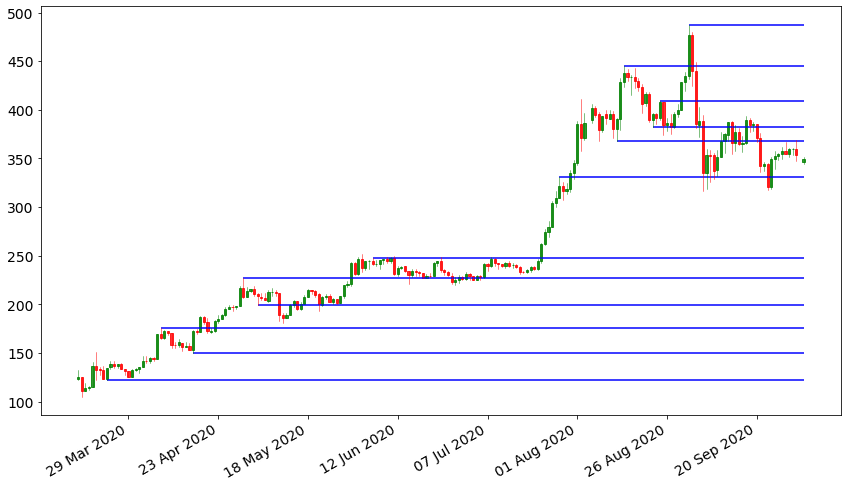

In [20]:
plot_all()